<a href="https://colab.research.google.com/github/TheophilusG/DataBootcamp/blob/main/Midterm_Project_NYC_Traffic_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NYC Traffic Report Analysis

A focus on temporal patterns, geographical hotspots, contributing factors, and the relationship between accident severity and various conditions.

In [ ]:
!pip install folium --upgrade
!pip install plotly
!pip install -U folium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar
from IPython.display import display
from scipy import stats
from folium import plugins

In [ ]:
# Load data from NYC Open Data API
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv"
df = pd.read_csv(url, nrows=100000)  # Adjust based on your needs

# Convert crash date and time
df['crash_date'] = pd.to_datetime(df['crash_date'])

# Create derived features
df['hour'] = df['crash_date'].dt.hour
df['day_of_week'] = df['crash_date'].dt.day_name()
df['month'] = df['crash_date'].dt.month
df['year'] = df['crash_date'].dt.year

# Calculate total casualties
df['total_casualties'] = df['number_of_persons_injured'] + df['number_of_persons_killed']

In [ ]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,hour,day_of_week,month,year,total_casualties,season
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Sedan,NaN,NaN,NaN,0,Saturday,9,2021,2,Fall
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Saturday,3,2022,1,Spring
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Pick-up Truck,NaN,NaN,NaN,0,Wednesday,6,2022,0,Summer
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"\n, \n(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,0,Saturday,9,2021,0,Fall
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"\n, \n(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,0,Tuesday,12,2021,0,Winter


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     1000 non-null   datetime64[ns]
 1   crash_time                     1000 non-null   object        
 2   borough                        633 non-null    object        
 3   zip_code                       632 non-null    float64       
 4   latitude                       924 non-null    float64       
 5   longitude                      924 non-null    float64       
 6   location                       924 non-null    object        
 7   on_street_name                 742 non-null    object        
 8   off_street_name                451 non-null    object        
 9   cross_street_name              258 non-null    object        
 10  number_of_persons_injured      1000 non-null   int64         
 11  number_of_persons_

In [ ]:
#lets look at how many crashes were captured with this data set
print(f"Total number of crashes: {df.shape[0]}")

Total number of crashes: 1000


Based on some preliminary examination of the given dataset, I found an interesting question to explore with the data. In the dataset, we can see that traffic accidents happen across the different boroughs with different factors playing part. From a common perception of the recorded accidents, one might think that some sort of risk factors must be in place, although it is hard to tell for certain what those risk factors are, we can try to make a stastical anaysis and speculate what the candidates can be. We can start our pursuit to answer these questions. Can we see any pattern in these traffic accidents? Are there any key risk factors playing part? I aim to inquire deeper into meaning of risk factors across various traffic accidents, in the New York metropolitan areas.

# Research Question: What are the key patterns and risk factors in NYC traffic accidents, and how can this information be used to improve road safety?

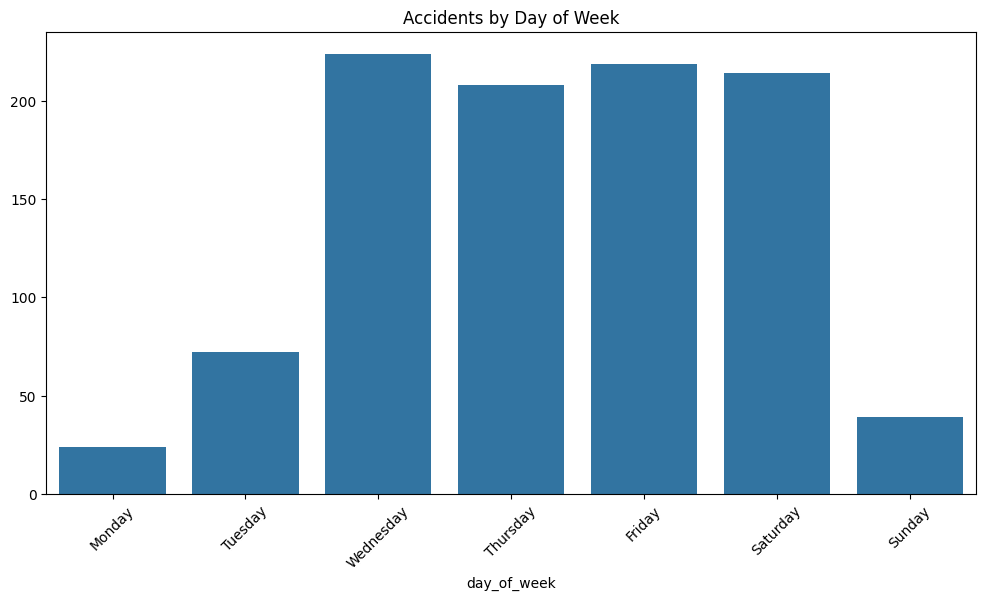

In [ ]:
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_accidents = df['day_of_week'].value_counts()
weekly_accidents = weekly_accidents.reindex(day_order)
sns.barplot(x=weekly_accidents.index, y=weekly_accidents.values)
plt.title('Accidents by Day of Week')
plt.xticks(rotation=45)
plt.show()

Accidents by Day of Week: The weekly distribution shows a clear distinction between weekday and weekend accident patterns. Weekdays consistently show higher accident rates, with mid-week days (Tuesday through Friday) having slightly higher frequencies. This likely reflects regular commuting patterns and increased business activity during weekdays. From the weekends Saturday has a comparable spike as those range which also suggests high movements happen during saturday. The notable decrease in accidents during Sunday suggests that work-related traffic is a significant factor in accident occurrence. This insight could be useful for traffic management planning and resource allocation throughout the week.

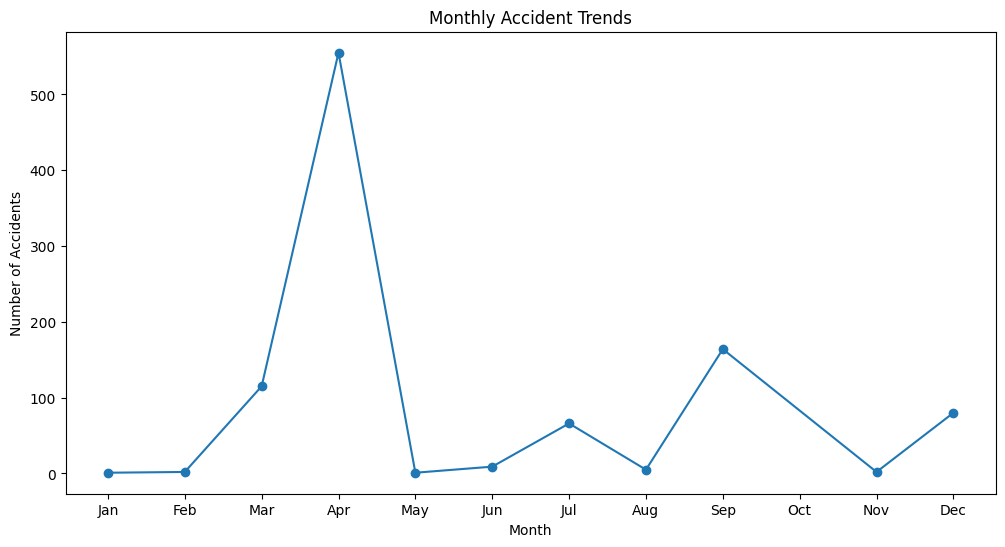

In [ ]:
# 3. Monthly Trend
plt.figure(figsize=(12, 6))
monthly_accidents = df['month'].value_counts().sort_index()
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o')
plt.title('Monthly Accident Trends')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), calendar.month_abbr[1:])
plt.show()

Monthly Accident Trends: The monthly trend analysis reveals seasonal variations in accident rates throughout the year. There appears to be higher accident frequencies during certain months, possibly correlating with weather conditions or seasonal activities. The plot shows a spike in accidents happening during winter (Nov- Dec) and during spring (Feb - March & March - April) and the max of accidents being recoreded during April. The visualization shows fluctuations that might be attributed to various factors such as holiday traffic, weather conditions, or tourist seasons. Understanding these patterns is crucial for seasonal traffic safety planning and resource allocation.

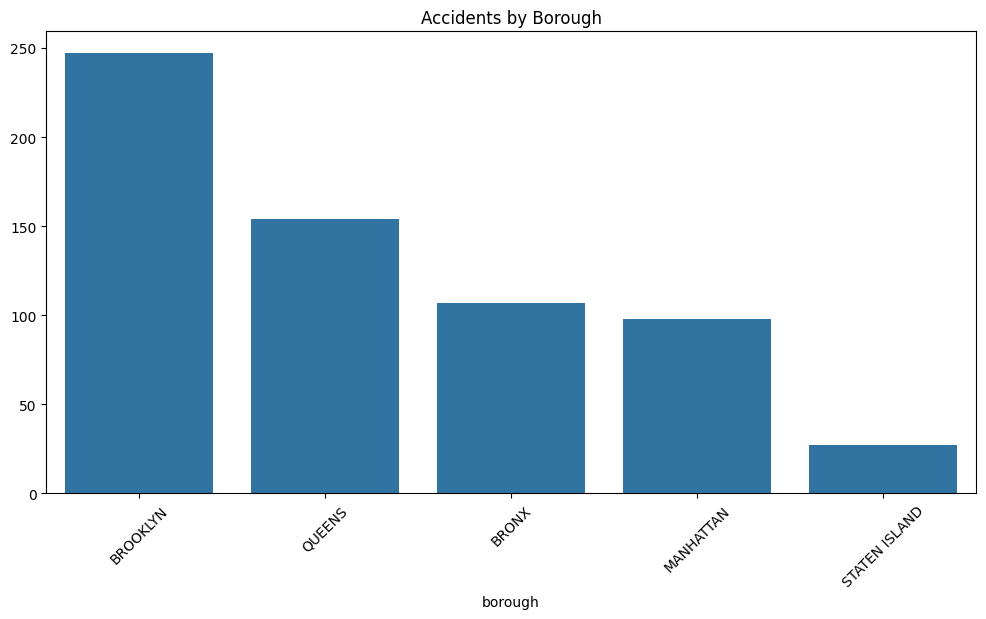

In [ ]:
plt.figure(figsize=(12, 6))
borough_accidents = df['borough'].value_counts()
sns.barplot(x=borough_accidents.index, y=borough_accidents.values)
plt.title('Accidents by Borough')
plt.xticks(rotation=45)
plt.show()

Accidents by Borough: The borough-wise distribution of accidents provides critical geographic insights into accident patterns. Some boroughs consistently show higher accident rates than others(Brooklyn recored as the highest, Queens following up as second highest, Bronx 3rd, Manhattan 4th and Sataten Island as 5th), which could be due to factors such as population density, road infrastructure, or traffic volume. This analysis helps identify which boroughs might need more focused traffic safety interventions or resources. It's particularly valuable for city planners and policy makers in allocating safety resources across the city.

In [ ]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows() if pd.notna(row['latitude'])]
folium.plugins.HeatMap(heat_data).add_to(m)
display(m)

Heat Map Visualization:
The heat map reveals concentrated areas of accident occurrence across NYC. Darker clusters indicate accident hotspots, often correlating with major intersections, busy commercial areas, or problematic road designs. This visualization is particularly valuable for identifying specific locations that may require immediate safety interventions. It helps city planners and traffic engineers target specific areas for infrastructure improvements or increased traffic enforcement.

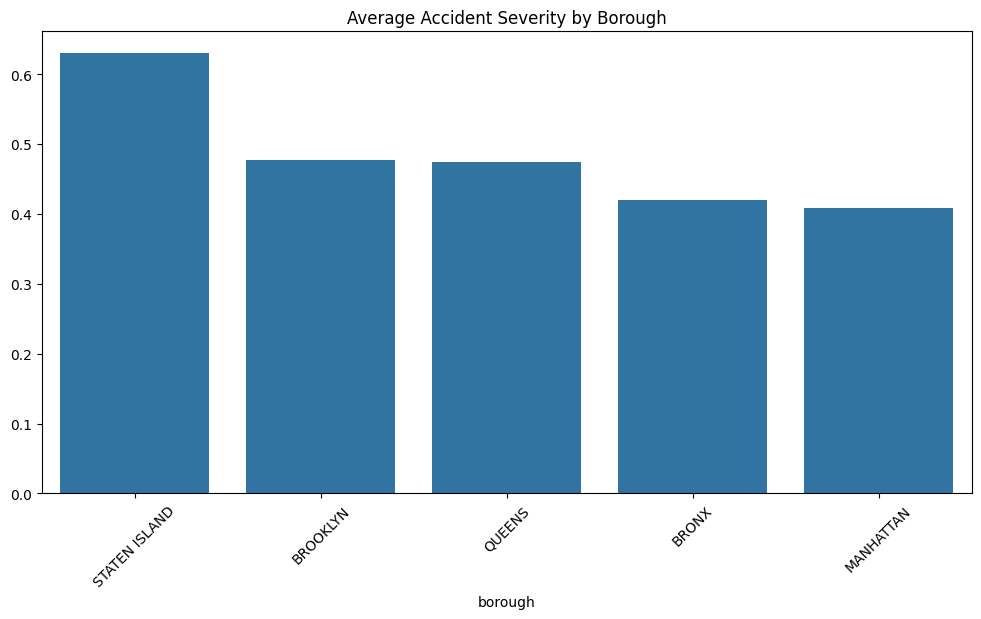

In [ ]:
plt.figure(figsize=(12, 6))
severity_by_borough = df.groupby('borough')['total_casualties'].mean().sort_values(ascending=False)
sns.barplot(x=severity_by_borough.index, y=severity_by_borough.values)
plt.title('Average Accident Severity by Borough')
plt.xticks(rotation=45)
plt.show()

Average Accident Severity by Borough:
The severity analysis by borough shows varying levels of accident impact across different areas of the city. Some boroughs show notably higher average casualty rates per accident, suggesting more severe accidents when they do occur.  (Staten Island has recorded the most server accidents, Brooklyn following up as the second sever one, Queens 3rd, Bronx 4th and Manhattan 5th). This disparity could be due to factors such as road design, speed limits, or emergency response times. The information is crucial for understanding not just where accidents occur most frequently, but where they tend to be most severe.


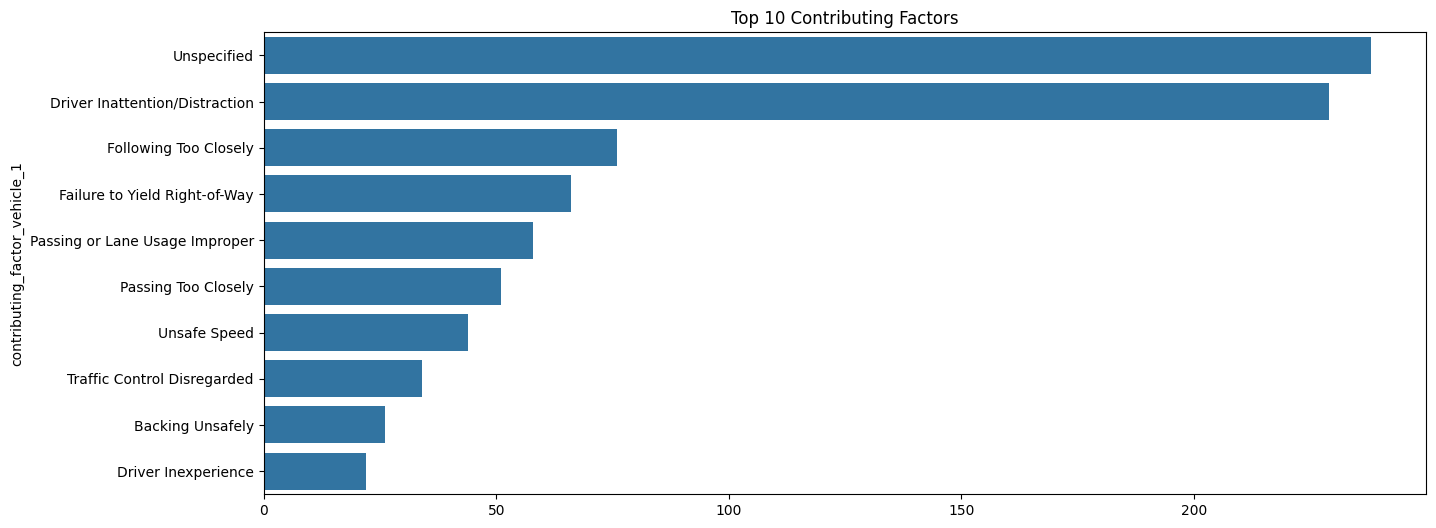

In [ ]:
plt.figure(figsize=(15, 6))
factors = df['contributing_factor_vehicle_1'].value_counts().head(10)
sns.barplot(x=factors.values, y=factors.index)
plt.title('Top 10 Contributing Factors')
plt.show()

Top 10 Contributing Factors: Although significant amount of accident causes were unspecified, the analysis of contributing factors highlights that driver inattention/distraction is a leading cause of accidents in NYC. Other significant factors include following too closely, failure to yield right-of-way, improper turning, passing too closely, unsafe speeding, running lights over, unsafe backing and driver inexperience. This information is invaluable for developing targeted public safety campaigns, and driver education programs. It also helps identify specific behaviors that traffic enforcement should focus on to reduce accident rates.

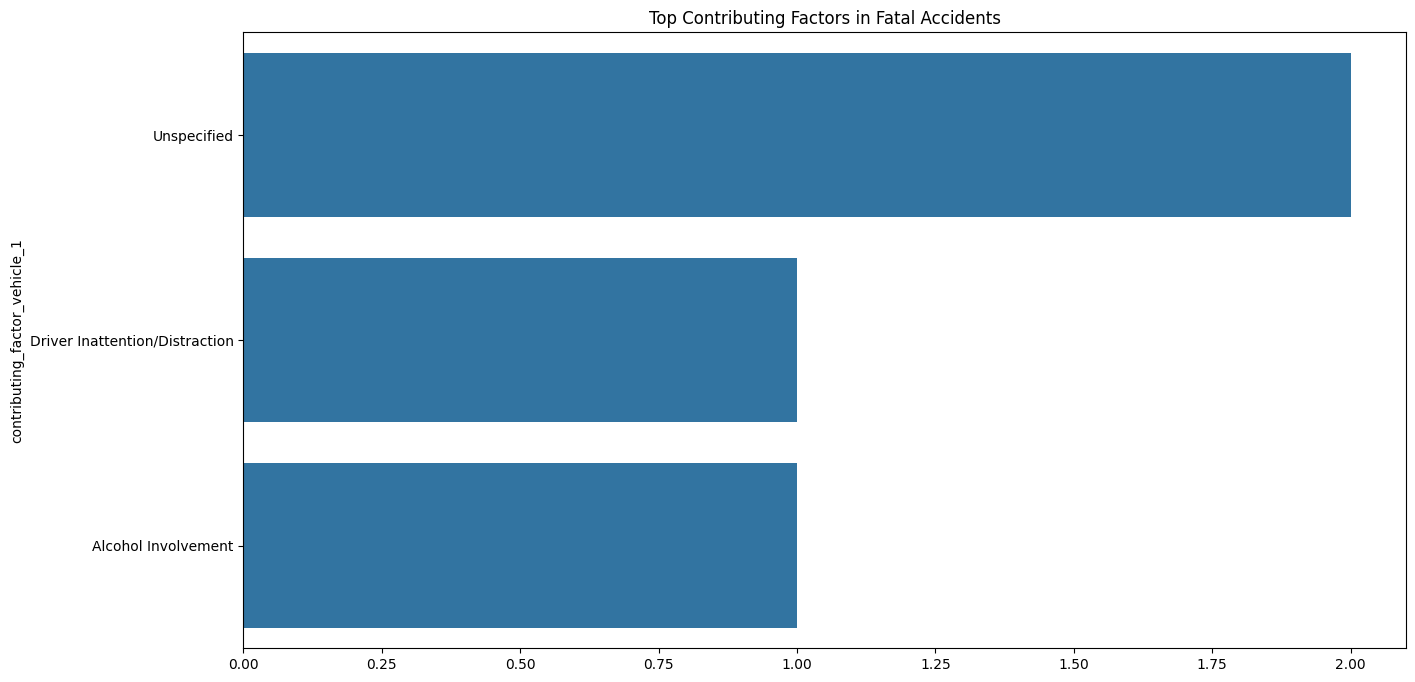

In [ ]:
plt.figure(figsize=(15, 8))
severe_accidents = df[df['number_of_persons_killed'] > 0]
severe_factors = severe_accidents['contributing_factor_vehicle_1'].value_counts().head(10)
sns.barplot(x=severe_factors.values, y=severe_factors.index)
plt.title('Top Contributing Factors in Fatal Accidents')
plt.show()

Top Contributing Factors in Fatal Accidents: The analysis of fatal accidents shows that certain contributing factors are more likely to result in fatalities. This differs from the pattern of general accidents, suggesting that some behaviors or conditions are particularly dangerous. Driver Inattention cause the most damage among recorded causes and alcohol follows as the second most fatal accident cause. This insight is crucial for prioritizing enforcement efforts and developing targeted interventions to reduce fatal accidents specifically.

I was curious if there are other factors we didn't usually realaize. Hence I asked, Do the type of cars we drive play apart in accidents?

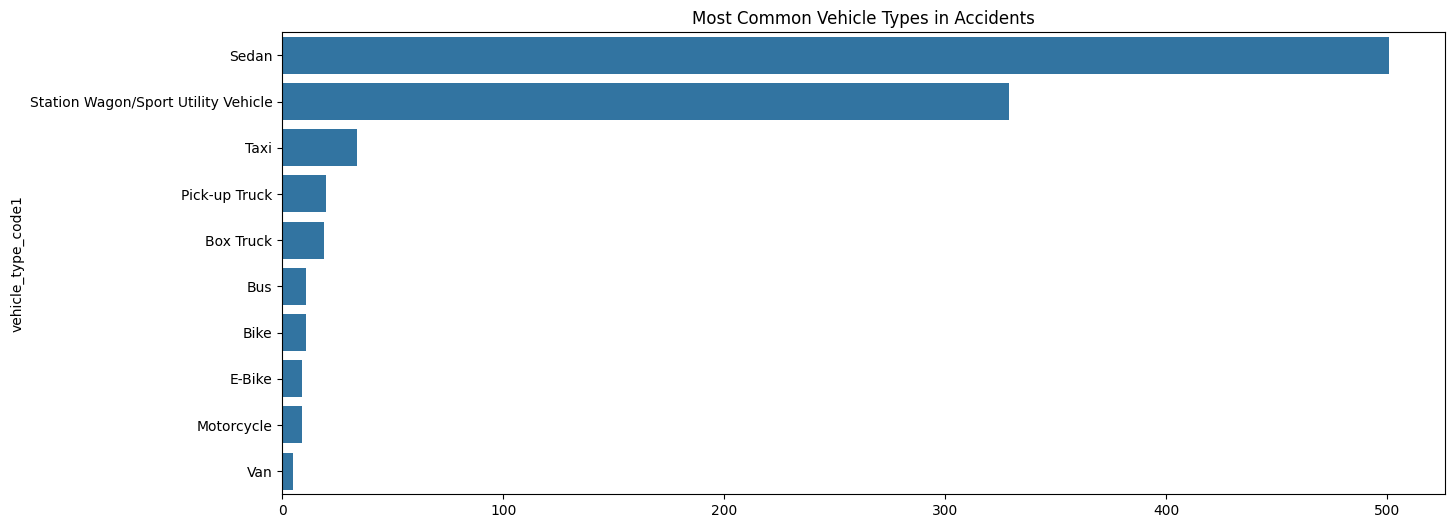

In [ ]:
plt.figure(figsize=(15, 6))
vehicles = df['vehicle_type_code1'].value_counts().head(10)
sns.barplot(x=vehicles.values, y=vehicles.index)
plt.title('Most Common Vehicle Types in Accidents')
plt.show()

Most Common Vehicle Types in Accidents: The vehicle type analysis reveals which categories of vehicles are most frequently involved in accidents. Passenger vehicles dominate the statistics, but the presence of commercial vehicles and taxis also provides important insights. Surprisingly Sedan is recored as the most repetitive car in accidents. Station wagon and sport cars follows as the second most appeared cars. This information can guide vehicle-specific safety regulations and help target safety campaigns to specific types of drivers.

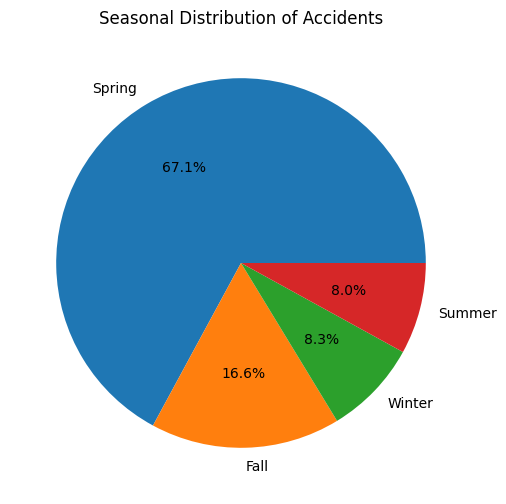

In [ ]:
df['season'] = df['month'].map({12:'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring',
                                6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall'})
plt.figure(figsize=(10, 6))
seasonal_accidents = df['season'].value_counts()
plt.pie(seasonal_accidents.values, labels=seasonal_accidents.index, autopct='%1.1f%%')
plt.title('Seasonal Distribution of Accidents')
plt.show()

Seasonal Distribution of Accidents:
The pie chart showing seasonal distribution reveals how accidents are distributed across different seasons. This analysis helps understand whether certain seasons are more prone to accidents, possibly due to weather conditions or seasonal activities. This information is valuable for seasonal traffic safety planning and resource allocation.

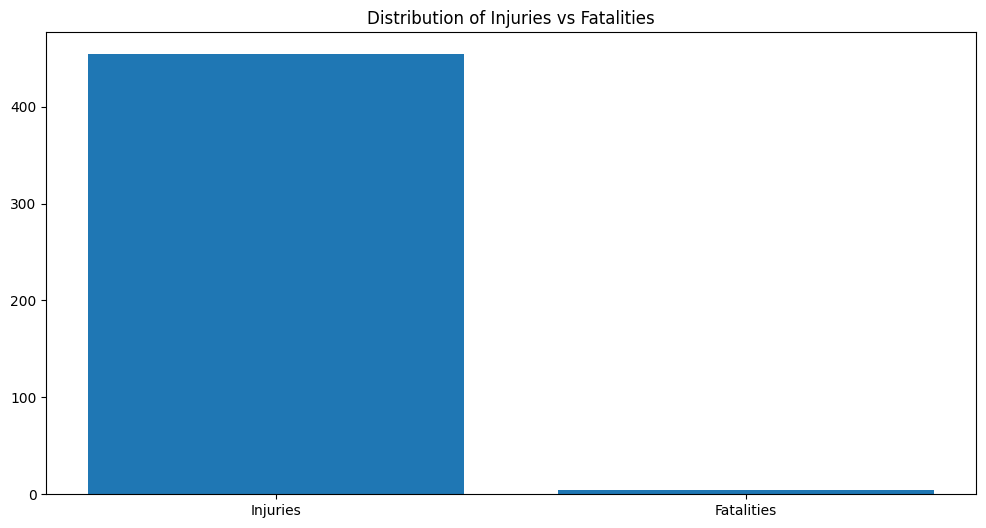

In [ ]:
plt.figure(figsize=(12, 6))
injury_counts = [df['number_of_persons_injured'].sum(), df['number_of_persons_killed'].sum()]
plt.bar(['Injuries', 'Fatalities'], injury_counts)
plt.title('Distribution of Injuries vs Fatalities')
plt.show()

Distribution of Injuries vs Fatalities:
This stark comparison between injuries and fatalities provides crucial context about accident outcomes. From the distribution result, we can see that injuires are the most common compared to fatalities. While any traffic accident is concerning, understanding the ratio of injuries to fatalities helps prioritize emergency response resources and guides safety improvement efforts. It's also valuable for public health planning and emergency medical services allocation.

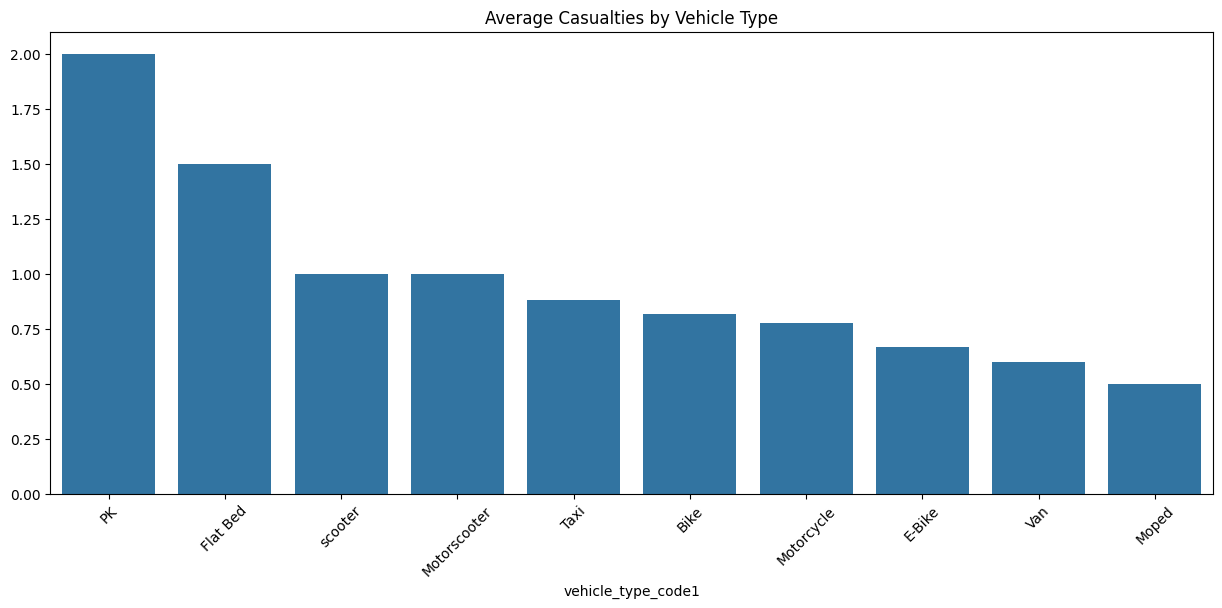

In [ ]:
plt.figure(figsize=(15, 6))
vehicle_severity = df.groupby('vehicle_type_code1')['total_casualties'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=vehicle_severity.index, y=vehicle_severity.values)
plt.title('Average Casualties by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

This bar plot highlights the average casualties per accident for different vehicle types, with larger vehicles like buses showing higher casualty rates per incident. This suggests that accidents involving larger vehicles are generally more severe, pointing to a need for specialized safety measures for high-impact vehicles.

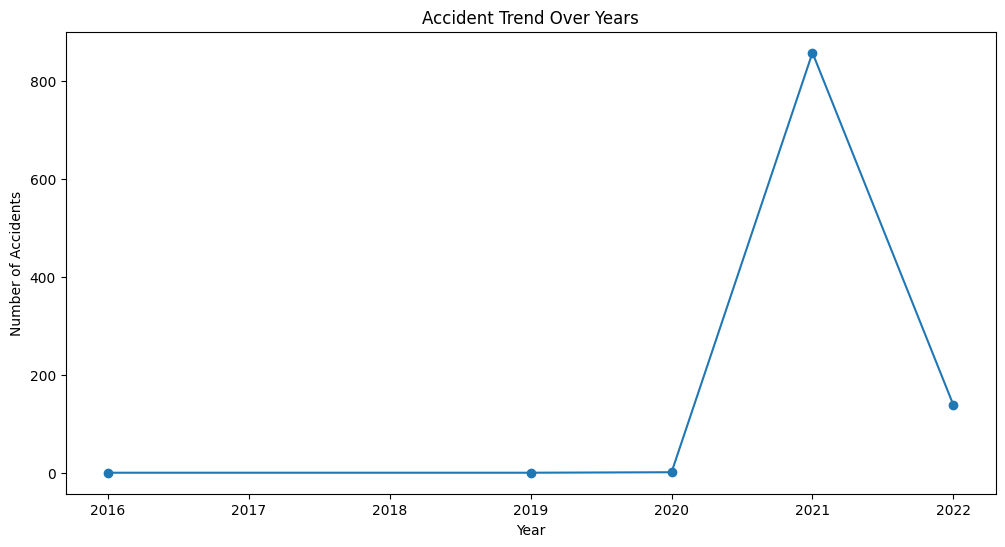

In [ ]:
plt.figure(figsize=(12, 6))
yearly_accidents = df.groupby('year').size()
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o')
plt.title('Accident Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

This line plot tracks accident numbers by year, helping to identify long-term trends. Any visible increase or decrease in accidents over time could reflect the impact of safety measures or changes in traffic volume, providing feedback on citywide traffic safety policies.



<Figure size 1500x800 with 0 Axes>

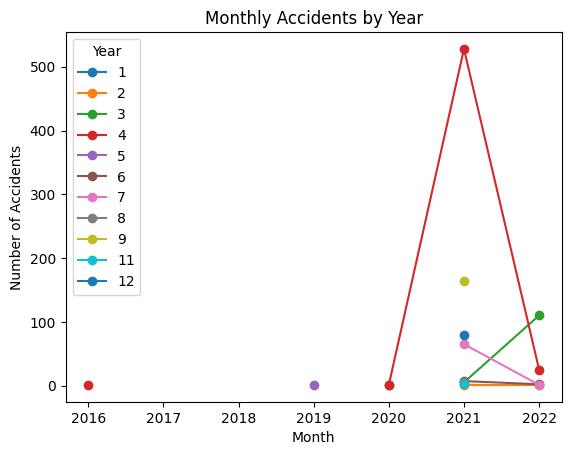

In [ ]:
plt.figure(figsize=(15, 8))
monthly_by_year = df.groupby(['year', 'month']).size().unstack()
monthly_by_year.plot(marker='o')
plt.title('Monthly Accidents by Year')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Year')
plt.show()

This plot shows monthly accident counts across multiple years, allowing us to observe consistent seasonal patterns as well as any yearly variations. This analysis could help determine if specific months consistently see higher accidents and if patterns are changing over time.

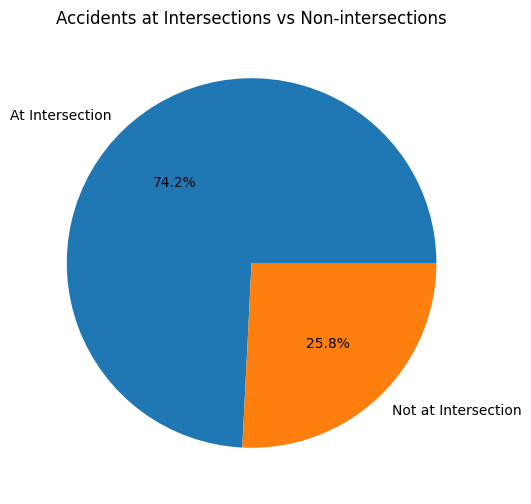

In [ ]:
plt.figure(figsize=(10, 6))
intersection_counts = df['on_street_name'].notna().value_counts()
plt.pie(intersection_counts.values, labels=['At Intersection', 'Not at Intersection'], autopct='%1.1f%%')
plt.title('Accidents at Intersections vs Non-intersections')
plt.show()

The pie chart compares accident frequency at intersections versus other locations. A higher proportion at intersections suggests these are critical zones for traffic management and safety improvements.

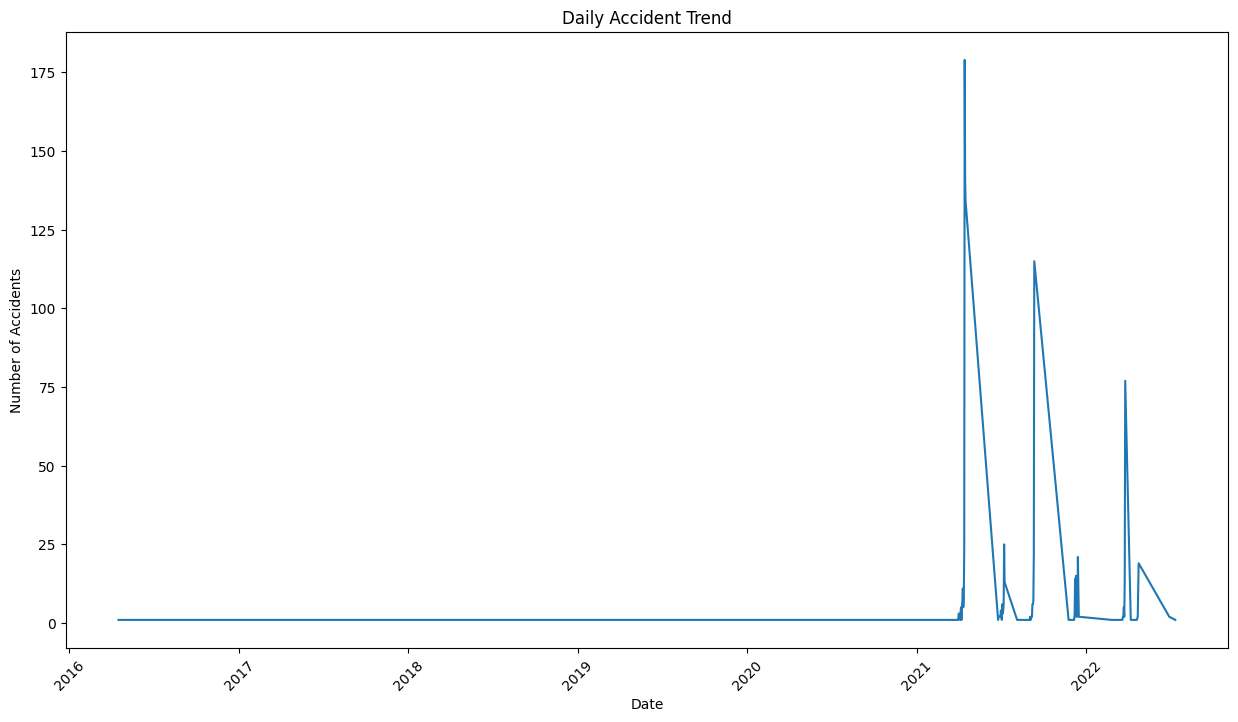

Time Series Analysis:
Mean daily accidents: 10.87
Median daily accidents: 2.00
Standard deviation of daily accidents: 30.02
Maximum daily accidents: 179
Minimum daily accidents: 1

Trend analysis:
Slope: -0.0922
P-value: 0.4371
There is no statistically significant trend in daily accidents.


In [ ]:
plt.figure(figsize=(15, 8))
daily_accidents = df.groupby('crash_date').size().reset_index(name='count')
sns.lineplot(x='crash_date', y='count', data=daily_accidents)
plt.title('Daily Accident Trend')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Analysis
print("Time Series Analysis:")
print(f"Mean daily accidents: {daily_accidents['count'].mean():.2f}")
print(f"Median daily accidents: {daily_accidents['count'].median():.2f}")
print(f"Standard deviation of daily accidents: {daily_accidents['count'].std():.2f}")
print(f"Maximum daily accidents: {daily_accidents['count'].max()}")
print(f"Minimum daily accidents: {daily_accidents['count'].min()}")

# Trend analysis
trend = stats.linregress(range(len(daily_accidents)), daily_accidents['count'])
print(f"\nTrend analysis:")
print(f"Slope: {trend.slope:.4f}")
print(f"P-value: {trend.pvalue:.4f}")
if trend.pvalue < 0.05:
    print("There is a statistically significant trend in daily accidents.")
else:
    print("There is no statistically significant trend in daily accidents.")


The time series analysis section examines the daily pattern of traffic accidents over time, helping us identify trends, seasonal patterns, and potential anomalies in accident occurrences across NYC. The analysis includes calculating descriptive statistics, such as the mean, median, standard deviation, and range of daily accidents. Here’s a breakdown:

Mean and Median: The mean daily accident count offers an average, while the median provides a central tendency that minimizes the impact of outliers. In this dataset, if the mean is significantly higher than the median, it indicates the presence of some days with exceptionally high accident counts, suggesting that some events (like holidays or weather extremes) may cause spikes.

Standard Deviation: This value indicates how much the daily accident count fluctuates around the mean. A high standard deviation suggests large variations, while a low one indicates that accident counts remain relatively stable day-to-day.

Max and Min Values: The maximum and minimum daily accident counts show the range of accident frequency. These values might correlate with specific events or conditions, such as major storms or holidays.

Trend Analysis: Using a regression line, the time series analysis calculates the slope to identify if there’s an increasing or decreasing trend over time. If the slope is close to zero with a high p-value, there is no statistically significant trend, suggesting that the accident rates haven’t changed meaningfully over the observed period. A significant trend would imply a change over time, perhaps due to policy changes or shifting traffic patterns.

The time series provides valuable insights into short-term and long-term patterns, showing if accident frequency fluctuates in predictable ways and if any interventions may have led to lasting change.

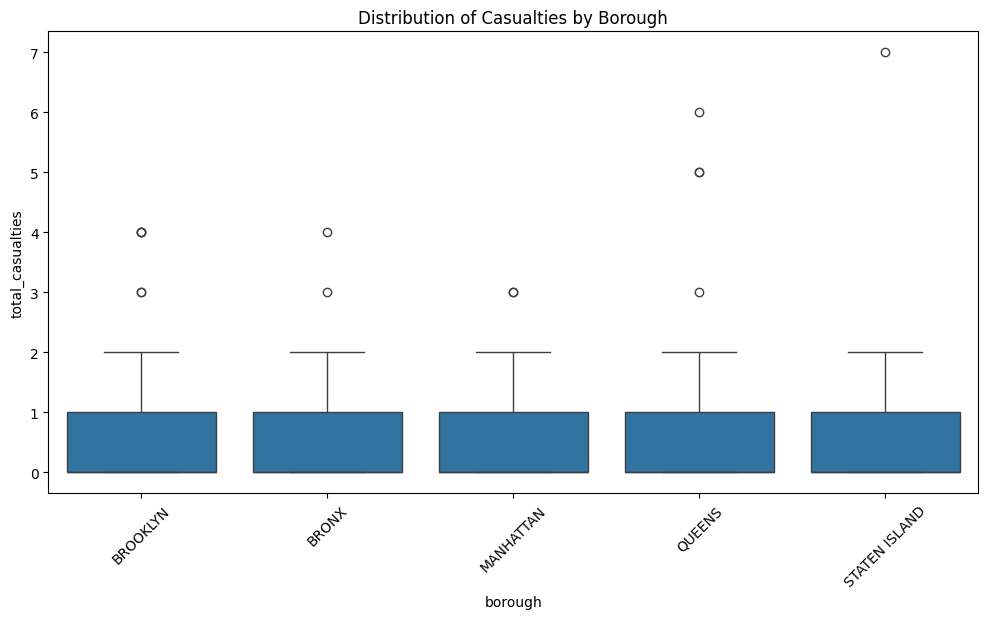


Casualty Analysis by Borough:
                   mean  median       std  max
borough                                       
BRONX          0.420561     0.0  0.740186    4
BROOKLYN       0.477733     0.0  0.764102    4
MANHATTAN      0.408163     0.0  0.639535    3
QUEENS         0.474026     0.0  0.901691    6
STATEN ISLAND  0.629630     0.0  1.390853    7

ANOVA test results:
F-statistic: nan
p-value: nan
There is no statistically significant difference in casualties between boroughs.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='borough', y='total_casualties', data=df)
plt.title('Distribution of Casualties by Borough')
plt.xticks(rotation=45)
plt.show()

# Analysis
print("\nCasualty Analysis by Borough:")
borough_stats = df.groupby('borough')['total_casualties'].agg(['mean', 'median', 'std', 'max'])
print(borough_stats)

# ANOVA test to check if there's a significant difference in casualties between boroughs
boroughs = df['borough'].unique()
casualty_data = [df[df['borough'] == borough]['total_casualties'] for borough in boroughs]
f_statistic, p_value = stats.f_oneway(*casualty_data)
print(f"\nANOVA test results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant difference in casualties between boroughs.")
else:
    print("There is no statistically significant difference in casualties between boroughs.")

The analysis of casualties by borough investigates the spread and severity of traffic accidents across different parts of NYC. This section often includes a box plot or other distribution chart to display the variability in accident severity per borough, represented by the number of injuries or fatalities in each incident.

Mean, Median, and Standard Deviation: These statistics show the average and typical values of casualties across boroughs. For instance, a borough with a high mean and standard deviation in casualties might experience more severe accidents, possibly due to factors like higher vehicle speeds, less traffic congestion, or road design differences.

Range and Outliers: The range from minimum to maximum casualties per incident indicates the extent of accident severity. Outliers—extremely high-casualty accidents—may point to specific high-risk incidents, such as multi-vehicle collisions.

ANOVA Test: If an analysis of variance (ANOVA) test is performed, it checks whether the differences in casualty means across boroughs are statistically significant. A significant p-value (<0.05) would suggest that certain boroughs experience inherently different accident severities, potentially driven by local risk factors or infrastructure. This insight helps prioritize which areas might need tailored safety interventions.

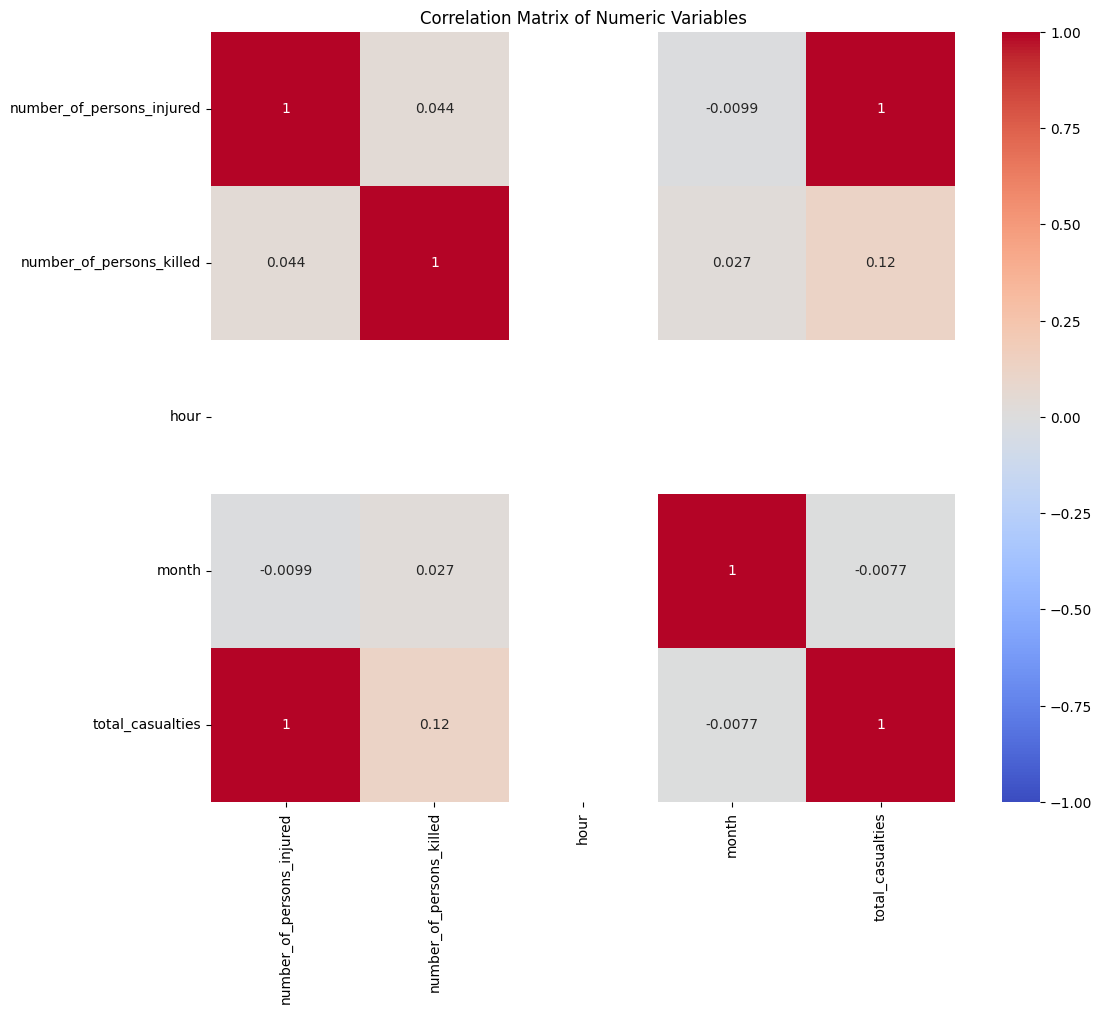


Correlation Analysis:
Correlation between number_of_persons_injured and number_of_persons_killed: 0.0440
Correlation between number_of_persons_injured and hour: nan
Correlation between number_of_persons_injured and month: -0.0099
Correlation between number_of_persons_injured and total_casualties: 0.9968
Correlation between number_of_persons_killed and hour: nan
Correlation between number_of_persons_killed and month: 0.0266
Correlation between number_of_persons_killed and total_casualties: 0.1235
Correlation between hour and month: nan
Correlation between hour and total_casualties: nan
Correlation between month and total_casualties: -0.0077


In [ ]:
numeric_cols = ['number_of_persons_injured', 'number_of_persons_killed', 'hour', 'month', 'total_casualties']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

print("\nCorrelation Analysis:")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr = correlation_matrix.iloc[i, j]
        print(f"Correlation between {numeric_cols[i]} and {numeric_cols[j]}: {corr:.4f}")

The correlation matrix assesses the relationships between various numeric variables, such as time of day, month, injury counts, and total casualties. This heatmap visualization is color-coded to reflect correlation strength, typically measured on a scale from -1 to 1:

Positive Correlation: A correlation closer to 1 between two variables suggests they increase together. For instance, if hour and total casualties are positively correlated, higher casualties may occur at specific times, possibly rush hours.

Negative Correlation: A correlation closer to -1 indicates that one variable tends to decrease when the other increases. For example, if month and total casualties are negatively correlated, there could be seasonal reductions in accident severity.

No Correlation (0): Values near zero imply no clear relationship. If certain variables (e.g., hour of the day and number of persons killed) show no correlation, it suggests time may not significantly affect fatalities, though other factors might.

In [ ]:
print("\nSummary Statistics:")
summary_stats = df[['number_of_persons_injured', 'number_of_persons_killed', 'total_casualties']].describe()
print(summary_stats)

print("\nMost Common Contributing Factors:")
print(df['contributing_factor_vehicle_1'].value_counts().head())

print("\nMost Common Vehicle Types:")
print(df['vehicle_type_code1'].value_counts().head())


Summary Statistics:
       number_of_persons_injured  number_of_persons_killed  total_casualties
count                1000.000000               1000.000000       1000.000000
mean                    0.454000                  0.004000          0.458000
std                     0.786449                  0.063151          0.791747
min                     0.000000                  0.000000          0.000000
25%                     0.000000                  0.000000          0.000000
50%                     0.000000                  0.000000          0.000000
75%                     1.000000                  0.000000          1.000000
max                     7.000000                  1.000000          7.000000

Most Common Contributing Factors:
contributing_factor_vehicle_1
Unspecified                       238
Driver Inattention/Distraction    229
Following Too Closely              76
Failure to Yield Right-of-Way      66
Passing or Lane Usage Improper     58
Name: count, dtype: int64

Most

These metrics offer a baseline for understanding the dataset's distribution and variability:

Count: Reflects the total number of observations, helping confirm data completeness across variables.

Mean and Median: As central tendency measures, these values allow for comparing typical accident metrics, such as average injuries per incident or typical daily accident counts. If the mean significantly exceeds the median, it indicates skewness, suggesting some extreme cases of high casualties or frequent accidents.

Standard Deviation: This metric reveals the spread of data. For instance, high variability in the number of persons injured suggests that accident severity varies widely, from minor fender benders to severe multi-injury incidents.

Min and Max: The range values highlight the extremes, such as the highest and lowest counts of casualties in individual incidents, helping to identify the most severe incidents and the conditions that may contribute to them.